## Chapter 5.3 サポートベクターマシン

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

プロット用関数を定義

In [2]:
def plot_dataset(dataset):
    fig, ax = plt.subplots()
    ax.tick_params(direction='in')
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color, s=40,
               edgecolor='black', linewidth='1',
               xticks=np.arange(-10, 10, 5), yticks=np.arange(-10, 10, 5),
               xlim=(-10, 10), ylim=(-10, 10), figsize=(5, 5))
        plt.grid(which='major', color='grey', linestyle='--')
    return fig, ax

def plot_boundary(clf):
    # 0.1刻みのグリッド点を生成する
    xx, yy = np.meshgrid(np.arange(-10, 10, 0.1),
                         np.arange(-10, 10, 0.1))
    # 生成したグリッド点1つ1つを推論をする
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 描画用に2次元配列に変換
    Z = Z.reshape(xx.shape)

    # 識別境界を描画
    plt.contour(xx, yy, Z, colors='b', levels=[0], linestyles=['-'])

データセットを作成

In [3]:
from sklearn.datasets import make_blobs

X_dataset, y_dataset = make_blobs(centers=[[-5, 5], [5, -3]],
                                  cluster_std=3,
                                  n_samples=20,
                                  center_box=(-10, 10),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

(<matplotlib.figure.Figure at 0x10fb62b10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10fb627d0>)

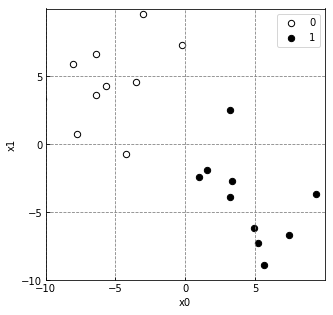

In [4]:
plot_dataset(dataset)

SVMで学習し、識別境界をプロット

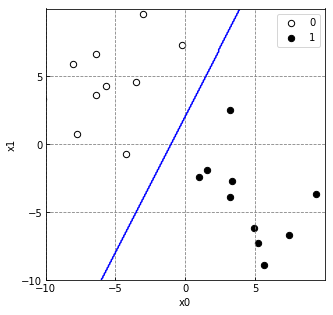

In [5]:
from sklearn.svm import SVC

# 線形SVMで学習
classifier = SVC(kernel='linear')
classifier.fit(X_dataset, y_dataset)

plot_dataset(dataset)
plot_boundary(classifier)

サポートベクターをプロット

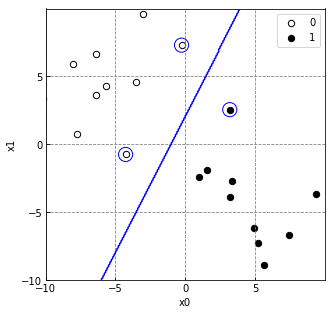

In [6]:
plot_dataset(dataset)
plot_boundary(classifier)

# サポートベクターをプロット
plt.scatter(classifier.support_vectors_[:, 0],
            classifier.support_vectors_[:, 1],
            facecolor='none', edgecolor='b',
            s=200)

プロット用関数を定義

In [7]:
def plot_dataset2(dataset):
    fig, ax = plt.subplots()
    ax.tick_params(direction='in')
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color, s=40,
               edgecolor='black', linewidth='1',
               xticks=np.arange(-2.5, 2.5, 1), yticks=np.arange(-2.5, 2.5, 1),
               xlim=(-2.5, 2.5), ylim=(-2.5, 2.5), figsize=(5, 5))
        plt.grid(which='major', color='grey', linestyle='--')
    return fig, ax

def plot_boundary2(clf):
    # 0.01刻みのグリッド点を生成する
    xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.01),
                         np.arange(-2.5, 2.5, 0.01))
    # 生成したグリッド点1つ1つを推論をする
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # 描画用に2次元配列に変換
    Z = Z.reshape(xx.shape)

    # 識別境界を描画
    plt.contour(xx, yy, Z, colors='b',
                levels=[-1, 0, 1], linestyles=['--', '-', '--'])

非線形識別境界をもつデータセットを作成

(<matplotlib.figure.Figure at 0x10fb970d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x112394690>)

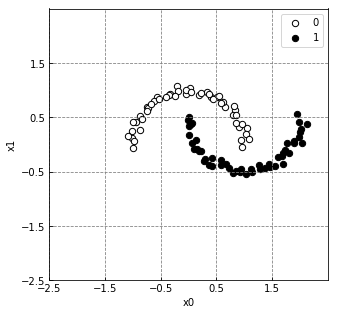

In [8]:
from sklearn.datasets import make_moons

X_dataset, y_dataset = make_moons(n_samples=100, noise=0.05, random_state=42)

dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

plot_dataset2(dataset)

非線形SVMで学習

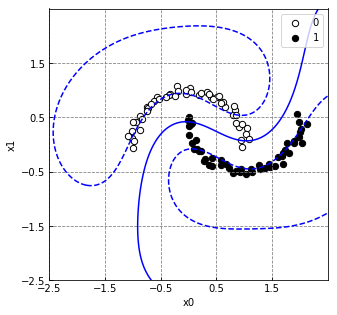

In [9]:
from sklearn.svm import SVC

# 非線形SVMで学習
classifier = SVC(kernel='rbf')
classifier.fit(X_dataset, y_dataset)

plot_dataset2(dataset)
plot_boundary2(classifier)

クラスが入り混じったデータセットを作成

(<matplotlib.figure.Figure at 0x11247c550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x112125f50>)

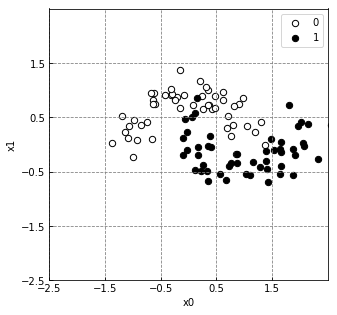

In [10]:
from sklearn.datasets import make_moons

# noiseを0.2に増やしデータをバラつかせる
X_dataset, y_dataset = make_moons(n_samples=100, noise=0.2, random_state=42)

dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

plot_dataset2(dataset)

非線形SVMのパラメータを変えて学習し、それぞれの識別境界をプロット

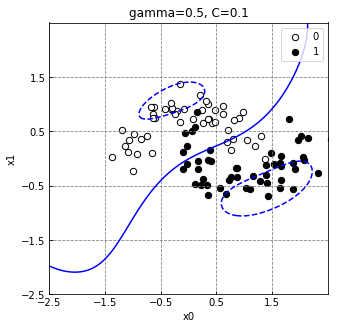

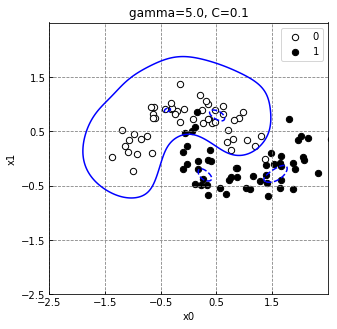

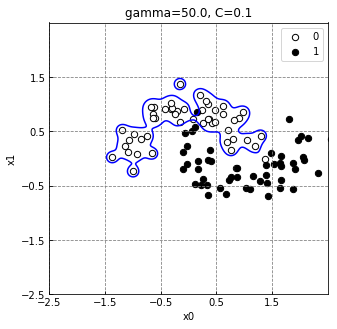

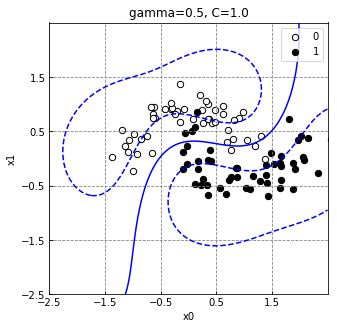

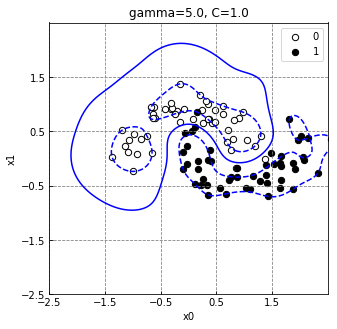

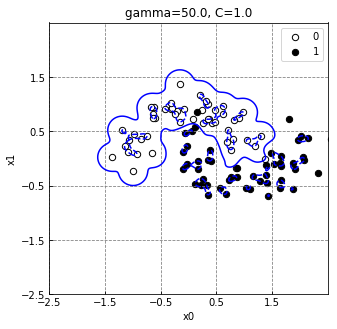

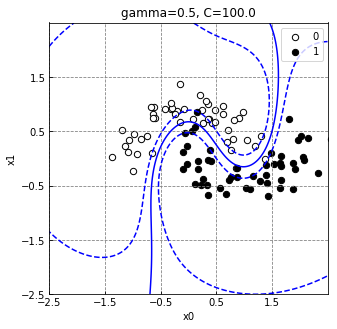

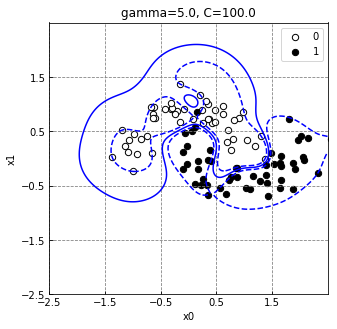

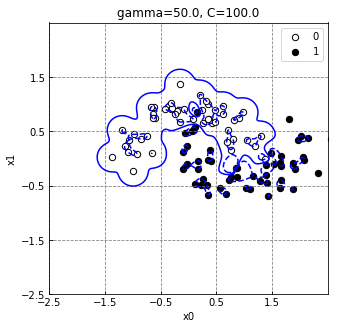

In [11]:
from sklearn.svm import SVC

# 非線形SVMで学習
classifier = SVC(kernel='rbf')

# パラメータのレンジを設定
c_range = [0.1, 1.0, 100.0]
gamma_range = [0.5, 5.0, 50.0]

# 各パラメータ毎に学習を行う
for row, c in enumerate(c_range):
    for col, gamma in enumerate(gamma_range):
        classifier.C = c
        classifier.gamma = gamma
        classifier.fit(X_dataset, y_dataset)

        # 識別境界をプロット
        plot_dataset2(dataset)
        plot_boundary2(classifier)
        plt.title('gamma=%.1f, C=%.1f' % (gamma, c))
        plt.show()